In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import csv
import math
from csv import writer

net = cv.dnn.readNetFromTensorflow("graph_opt.pb")

inWidth = 368
inHeight = 368
inScale = 1

thr = 0.2

BODY_PARTS = {"Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
              "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
              "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
              "LEye": 15, "REar": 16, "LEar": 17, "Background": 18}

POSE_PAIRS = [["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
              ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
              ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
              ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
              ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"]]

#Import image

#img = cv.imread("pose.png")
#plt.imshow(img)
#plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    inp = cv.dnn.blobFromImage(frame, inScale, (inWidth, inHeight),
                               (0, 0, 0), swapRB=False, crop=False)
    net.setInput(inp)
    out = net.forward()

    assert (len(BODY_PARTS) <= out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]

        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert (partFrom in BODY_PARTS)
        assert (partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    return frame



#estimated_image = pose_estimation(img)
#plt.imshow(cv.cvtColor(estimated_image, cv.COLOR_BGR2RGB))

#Video
vidcoordinates = []
vidvalue = []
vidnames=[]
namessubjects = ['Marcus','Andrei','Elsa','Nathalie','Oskar','Viktor']
for i in range(2):
    for j in namessubjects:
        for k in range(10):
                vidvalue.append(i)
                vidnames.append(f'Armataxi {i} - {j} - {k+1}.mp4')
print(vidnames)
#vidnamess = ['Pares i arm right 3 - 1080 50fps - 1_Trim.mp4', 'Pares i arm right 3 - 1080 50fps - 2_Trim.mp4']
#vidnamess = ['nataliepeka1_1_20.mp4', 'nataliepeka1_4_20.mp4']
counter = 0
for i in vidnames:
    print(i)
    if counter == 10:
        counter = 0
    counter += 1
    if "Elsa" in i or "Andrei" in i or 'Nathalie' in i:
        if counter <= 5:
            counter2 = counter + 5
        if counter > 5:
            counter2 = counter - 5
    else:
        counter2 = counter
    print(counter2)
    allpoints = []
    cap = cv.VideoCapture(i)
    cap.set(3, 800)
    cap.set(4, 800)

    if not cap.isOpened():
        cap = cv.VideoCapture(0)
    if not cap.isOpened():
        raise IOError('Cannot open video')
    while cv.waitKey(1) < 0:
        hasFrame, frame = cap.read()
        if not hasFrame:
            cv.waitKey()
            break
        frameWidth = frame.shape[1]
        frameHeight = frame.shape[0]
        inp = cv.dnn.blobFromImage(frame, inScale, (inWidth, inHeight),
                                   (0, 0, 0), swapRB=False, crop=False)
        net.setInput(inp)
        out = net.forward()

        assert (len(BODY_PARTS) <= out.shape[1])

        points = []
        for i in range(len(BODY_PARTS)):
            # Slice heatmap of corresponding body's part.
            heatMap = out[0, i, :, :]

            # Originally, we try to find all the local maximums. To simplify a sample
            # we just find a global one. However only a single pose at the same time
            # could be detected this way.
            _, conf, _, point = cv.minMaxLoc(heatMap)
            x = (frameWidth * point[0]) / out.shape[3]
            y = (frameHeight * point[1]) / out.shape[2]

            # Add a point if it's confidence is higher than threshold.
            points.append((int(x), int(y)) if conf > thr else None)

        for pair in POSE_PAIRS:
            partFrom = pair[0]
            partTo = pair[1]
            assert (partFrom in BODY_PARTS)
            assert (partTo in BODY_PARTS)

            idFrom = BODY_PARTS[partFrom]
            idTo = BODY_PARTS[partTo]

            if points[idFrom] and points[idTo]:
                cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
                cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
                cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

        t, _ = net.getPerfProfile()
        freq = cv.getTickFrequency() / 2000
        cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
        #print(points)
        #cv.imshow('Pose estimation Tutorial', frame)
        if points[4] is not None and points[0] is not None and counter2 <= 5:
                dist = math.sqrt((points[4][1]-points[0][1])**2+(points[4][0]-points[0][0])**2)
                allpoints.append(dist) 
        if points[7] is not None and points[0] is not None and counter2 > 5:
                dist = math.sqrt((points[7][1]-points[0][1])**2+(points[7][0]-points[0][0])**2)
                allpoints.append(dist)
    print(allpoints)
    with open('vidcoordinates_openpose_ataxi_arm.csv', 'a') as f_object:
        writer_object = writer(f_object)
        writer_object.writerow(allpoints)
        f_object.close()
#print(vidcoordinates)

['Armataxi 0 - Marcus - 1.mp4', 'Armataxi 0 - Marcus - 2.mp4', 'Armataxi 0 - Marcus - 3.mp4', 'Armataxi 0 - Marcus - 4.mp4', 'Armataxi 0 - Marcus - 5.mp4', 'Armataxi 0 - Marcus - 6.mp4', 'Armataxi 0 - Marcus - 7.mp4', 'Armataxi 0 - Marcus - 8.mp4', 'Armataxi 0 - Marcus - 9.mp4', 'Armataxi 0 - Marcus - 10.mp4', 'Armataxi 0 - Andrei - 1.mp4', 'Armataxi 0 - Andrei - 2.mp4', 'Armataxi 0 - Andrei - 3.mp4', 'Armataxi 0 - Andrei - 4.mp4', 'Armataxi 0 - Andrei - 5.mp4', 'Armataxi 0 - Andrei - 6.mp4', 'Armataxi 0 - Andrei - 7.mp4', 'Armataxi 0 - Andrei - 8.mp4', 'Armataxi 0 - Andrei - 9.mp4', 'Armataxi 0 - Andrei - 10.mp4', 'Armataxi 0 - Elsa - 1.mp4', 'Armataxi 0 - Elsa - 2.mp4', 'Armataxi 0 - Elsa - 3.mp4', 'Armataxi 0 - Elsa - 4.mp4', 'Armataxi 0 - Elsa - 5.mp4', 'Armataxi 0 - Elsa - 6.mp4', 'Armataxi 0 - Elsa - 7.mp4', 'Armataxi 0 - Elsa - 8.mp4', 'Armataxi 0 - Elsa - 9.mp4', 'Armataxi 0 - Elsa - 10.mp4', 'Armataxi 0 - Nathalie - 1.mp4', 'Armataxi 0 - Nathalie - 2.mp4', 'Armataxi 0 - Nathal

[288.294987816299, 288.294987816299, 269.09106265351886, 269.09106265351886, 189.0952141118331, 171.9447585708852, 203.90684147423792, 203.90684147423792, 203.90684147423792, 191.637678967368, 229.16587878652442, 229.16587878652442, 229.16587878652442, 268.0242526339734, 268.0242526339734, 307.7092783781471, 307.7092783781471, 307.7092783781471, 346.9755034580972, 346.9755034580972, 341.2565017695634, 382.4604554721965, 382.4604554721965, 378.92611417003184, 420.63404522220975, 420.63404522220975, 420.63404522220975, 460.5746410735181, 460.5746410735181, 460.5746410735181, 460.5746410735181, 501.5276662358718, 501.5276662358718, 501.5276662358718, 501.5276662358718, 501.5276662358718, 543.4868903662718, 543.4868903662718, 543.4868903662718, 543.4868903662718, 543.4868903662718, 545.0302743884967, 545.0302743884967, 545.0302743884967, 545.0302743884967, 545.0302743884967, 545.0302743884967, 545.0302743884967, 547.4933789553988, 547.4933789553988, 547.4933789553988, 547.4933789553988, 54

[411.41827864109297, 411.41827864109297, 411.41827864109297, 411.41827864109297, 411.41827864109297, 411.41827864109297, 269.09106265351886, 269.09106265351886, 269.09106265351886, 251.46172671005024, 251.46172671005024, 234.06195760951843, 234.06195760951843, 234.06195760951843, 265.6633207652121, 265.6633207652121, 252.1150531007619, 252.1150531007619, 252.1150531007619, 299.82828418946735, 299.82828418946735, 299.82828418946735, 299.82828418946735, 335.7752224331033, 325.16149833582693, 325.16149833582693, 325.16149833582693, 362.5424113121112, 362.5424113121112, 362.5424113121112, 353.89970330589426, 393.7829351305107, 393.7829351305107, 393.7829351305107, 428.43902716722715, 428.43902716722715, 428.43902716722715, 469.5061234957431, 469.5061234957431, 465.29560496527364, 465.29560496527364, 505.8665832015394, 505.8665832015394, 505.8665832015394, 505.8665832015394, 547.4933789553988, 547.4933789553988, 547.4933789553988, 547.4933789553988, 547.4933789553988, 547.4933789553988, 547

[225.7631502260721, 225.7631502260721, 225.7631502260721, 225.7631502260721, 225.7631502260721, 206.20620747203515, 188.43035848822237, 171.21331723905124, 203.08865059377396, 203.08865059377396, 203.08865059377396, 238.64827675891564, 238.64827675891564, 276.0235497199469, 267.0880004792428, 346.9755034580972, 346.9755034580972, 386.6018623855814, 386.6018623855814, 381.4773912042495, 427.46344872983, 427.46344872983, 427.46344872983, 464.30701050059537, 464.30701050059537, 505.8665832015394, 505.8665832015394, 505.8665832015394, 505.8665832015394, 546.5016010955503, 546.5016010955503, 546.5016010955503, 546.5016010955503, 550.0909015790027, 588.1802444829306, 591.516694608022, 591.516694608022, 591.516694608022, 591.516694608022, 591.516694608022, 591.516694608022, 591.516694608022, 550.0909015790027, 591.516694608022, 550.0909015790027, 550.0909015790027, 550.0909015790027, 550.0909015790027, 550.0909015790027, 550.0909015790027, 550.0909015790027, 550.0909015790027, 550.09090157900

[171.21331723905124, 188.43035848822237, 171.21331723905124, 171.21331723905124, 203.08865059377396, 203.08865059377396, 203.08865059377396, 238.64827675891564, 238.64827675891564, 238.64827675891564, 276.0235497199469, 276.0235497199469, 276.0235497199469, 314.56795768164307, 314.56795768164307, 352.9560879202964, 346.01300553591915, 346.01300553591915, 386.6018623855814, 386.6018623855814, 427.46344872983, 427.46344872983, 427.46344872983, 464.30701050059537, 464.30701050059537, 468.52641334294054, 504.8762224545735, 504.8762224545735, 504.8762224545735, 504.8762224545735, 508.7592750997273, 508.7592750997273, 550.0909015790027, 550.0909015790027, 550.0909015790027, 554.4844452281777, 554.4844452281777, 554.4844452281777, 560.040177130177, 560.040177130177, 560.040177130177, 560.040177130177, 560.040177130177, 560.040177130177, 566.2684875569186, 566.2684875569186, 566.2684875569186, 566.2684875569186, 566.2684875569186, 566.2684875569186, 566.2684875569186, 566.2684875569186, 566.26

[293.960881751297, 293.960881751297, 271.0221393170676, 286.6862396418775, 286.6862396418775, 286.6862396418775, 286.6862396418775, 286.6862396418775, 286.6862396418775, 286.6862396418775, 306.78983033992506, 306.78983033992506, 287.7168747223562, 287.7168747223562, 287.7168747223562, 287.7168747223562, 287.7168747223562, 313.8295715830489, 313.8295715830489, 313.8295715830489, 313.8295715830489, 313.8295715830489, 313.8295715830489, 313.8295715830489, 313.8295715830489, 313.8295715830489, 343.11076928595526, 327.14064253773176, 343.11076928595526, 343.11076928595526, 327.14064253773176, 327.14064253773176, 327.14064253773176, 327.14064253773176, 312.80025575437116, 312.80025575437116, 312.80025575437116, 298.9916386790774, 298.9916386790774, 334.90297102295165, 334.90297102295165, 334.90297102295165, 334.90297102295165, 334.90297102295165, 371.1940193483726, 371.1940193483726, 371.1940193483726, 371.1940193483726, 371.1940193483726, 371.1940193483726, 361.62134892729995, 361.621348927

[339.3081195609678, 339.3081195609678, 339.3081195609678, 339.3081195609678, 339.3081195609678, 339.3081195609678, 339.3081195609678, 339.3081195609678, 316.0917588296158, 351.94601858807835, 351.94601858807835, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 308.4623153644542, 327.2308053958246, 327.2308053958246, 327.2308053958246, 327.2308053958246, 327.2308053958246, 327.2308053958246, 327.2308053958246, 350.4111870360306, 350.4111870360306, 350.4111870360306, 350.4111870360306, 350.4111870360306, 350.4111870360306, 331.4030778372464, 350.4111870360306, 331.4030778372464, 331.4030778372464, 331.4030778372464, 331.4030778372464, 359.25478424093393, 359.25478424093393, 331.4030778372464, 359.25478424093393, 359.25478424093393, 343.11076928595526, 343.11076928595526, 343.11076928595526, 34

[327.7392256047481, 307.33206796558017, 307.33206796558017, 307.33206796558017, 307.33206796558017, 307.33206796558017, 331.4030778372464, 331.4030778372464, 331.4030778372464, 331.4030778372464, 331.4030778372464, 331.4030778372464, 331.4030778372464, 359.25478424093393, 313.8295715830489, 359.25478424093393, 343.11076928595526, 343.11076928595526, 343.11076928595526, 343.11076928595526, 343.11076928595526, 343.11076928595526, 343.11076928595526, 343.11076928595526, 343.11076928595526, 343.11076928595526, 374.81862280308326, 374.81862280308326, 374.81862280308326, 374.81862280308326, 374.81862280308326, 374.81862280308326, 360.25685281476603, 360.25685281476603, 360.25685281476603, 360.25685281476603, 360.25685281476603, 360.25685281476603, 360.25685281476603, 360.25685281476603, 360.25685281476603, 360.25685281476603, 360.25685281476603, 347.28662513837185, 347.28662513837185, 347.28662513837185, 347.28662513837185, 383.275357934736, 383.275357934736, 383.275357934736, 383.2753579347

[316.0917588296158, 316.0917588296158, 316.0917588296158, 316.0917588296158, 316.0917588296158, 316.0917588296158, 316.0917588296158, 316.0917588296158, 316.0917588296158, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 347.7269043372974, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 347.2477501726973, 369.173400992, 347.2477501726973, 347.2477501726973, 350.4111870360306, 350.4111870360306, 350.4111870360306, 327.2308053958246, 327.2308053958246, 350.4111870360306, 350.4111870360306, 327.2308053958246, 350.4111870360306, 376.86071697644473, 376.86071697644473, 376.86071697644473, 376.86071697644473, 376.86071697644473, 376.86071697644473, 359.25478424093393, 359.25478424093393, 359.25478424093393, 350.4111870360306, 395.1404813480897, 350.4111870360306, 331.4030778372464, 331.4030778372464, 359.25478424093393, 389.6511260088953, 389.6511260088953, 389.6511260088953, 389.6

[330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 327.7392256047481, 327.7392256047481, 327.7392256047481, 307.33206796558017, 307.33206796558017, 307.33206796558017, 307.33206796558017, 307.33206796558017, 307.33206796558017, 307.33206796558017, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 314.4932431706602, 332.0316249997882, 314.4932431706602, 314.4932431706602, 343.8400791065521, 343.8400791065521, 343.8400791065521, 343.8400791065521, 343.8400791065521, 343.8400791065521, 343.8400791065521, 343.8400791065521, 375.598189559002, 361.0678606

[330.92597359530424, 330.92597359530424, 330.92597359530424, 330.92597359530424, 330.92597359530424, 330.92597359530424, 348.60436027106715, 348.60436027106715, 348.60436027106715, 327.7392256047481, 327.7392256047481, 307.33206796558017, 327.7392256047481, 307.33206796558017, 307.33206796558017, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 332.8092546790128, 332.8092546790128, 360.6688231605277, 360.6688231605277, 360.6688231605277, 360.6688231605277, 360.6688231605277, 343.8400791065521, 360.6688231605277, 360.6688231605277, 343.8400791065521, 343.8400791065521, 343.8400791065521, 375.598189559002, 375.598189559002, 375.598189559002, 375.598189559002, 361.65314874890834, 361.65314874890834, 361.65314874890834, 348.1278500780999, 395.60080889704966, 395.60080889704966, 395.60080889704966, 395.600808897049

[352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 368.95799218881274, 368.95799218881274, 368.95799218881274, 368.95799218881274, 368.95799218881274, 368.95799218881274, 348.60436027106715, 348.60436027106715, 348.60436027106715, 348.60436027106715, 348.60436027106715, 370.563085047607, 370.563085047607, 370.563085047607, 370.563085047607, 370.563085047607, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 377.5248336202534, 377.5248336202534, 377.5248336202534, 377.5248336202534, 377.5248336202534, 377.5248336202534, 360.6688231605277, 377.5248336202534, 360.6688231605277, 360.6688231605277, 360.6688231605277, 360.6688231605277, 343.8400791065521, 391.0626548265636, 375.598189559002, 343.8400791065521, 375.598189559002, 361.0678606577993, 375.598189559002, 375.598189559002, 361.0678606577993, 361.0678606577993, 361.65314874890834, 361.65314874890834, 3

[308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 327.7392256047481, 327.7392256047481, 327.7392256047481, 307.33206796558017, 307.33206796558017, 307.33206796558017, 307.33206796558017, 307.33206796558017, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 314.4932431706602, 314.4932431706602, 314.4932431706602, 314.4932431706602, 314.4932431706602, 314.4932431706602, 314.4932431706602, 343.8400791065521, 296.98821525441036, 327.9054741842533, 327.9054741842533, 327.9054741842533, 327.9054741842533, 343.8400791065521, 327.9054741842533, 327.9054741842533, 327.9054741842533, 313.6000637755037, 361.0678606577993, 361.0678606577993, 348.1278500780999, 348.1278500780999, 348.1278500780999, 348.1278500780999, 348.1278500780999, 348.1278500780999, 348.1278500780999, 383.275357934736, 383.275357934736, 372.09138662430763, 372.09138662430763, 372.09138662430763, 3

[316.3558123379433, 316.3558123379433, 316.3558123379433, 330.00151514803684, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 308.86890422961, 327.7392256047481, 327.7392256047481, 307.33206796558017, 307.33206796558017, 307.33206796558017, 307.33206796558017, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 332.0316249997882, 314.4932431706602, 314.4932431706602, 314.4932431706602, 314.4932431706602, 314.4932431706602, 314.4932431706602, 314.4932431706602, 314.4932431706602, 314.4932431706602, 343.8400791065521, 343.8400791065521, 343.8400791065521, 343.8400791065521, 343.8400791065521, 343.8400791065521, 327.9054741842533, 327.9054741842533, 327.9054741842533, 361.0678606577993, 361.0678606577993, 361.0678606577993, 361.0678606577993, 348.1278500780999, 348.1278500780999, 383.275357934736, 383.275357934736, 383.275357934736, 383.275357934736, 383.275357934736, 383.2753

[207.0024154448445, 188.43035848822237, 188.43035848822237, 188.43035848822237, 188.43035848822237, 188.43035848822237, 218.56349191939628, 218.56349191939628, 218.56349191939628, 251.2866888635369, 251.2866888635369, 299.5413160150032, 299.5413160150032, 287.020905161976, 324.2606975876047, 314.94126436527813, 354.2315626818141, 354.2315626818141, 393.1272058761642, 393.1272058761642, 433.3739724533535, 433.3739724533535, 433.3739724533535, 468.52641334294054, 468.52641334294054, 468.52641334294054, 468.52641334294054, 468.52641334294054, 464.4588248704076, 464.4588248704076, 464.4588248704076, 464.4588248704076, 464.4588248704076, 464.4588248704076, 503.1997615261756, 464.4588248704076, 503.1997615261756, 503.1997615261756, 503.1997615261756, 503.1997615261756, 503.1997615261756, 503.1997615261756, 503.1997615261756, 464.4588248704076, 464.4588248704076, 506.0059288190209, 464.4588248704076, 464.4588248704076, 464.4588248704076, 464.4588248704076, 464.4588248704076, 464.4588248704076

[251.46172671005024, 251.46172671005024, 251.46172671005024, 234.76371099469355, 234.76371099469355, 251.46172671005024, 251.46172671005024, 251.46172671005024, 251.46172671005024, 280.3711825420009, 296.99831649354513, 327.7865158910598, 327.7865158910598, 280.3711825420009, 280.3711825420009, 312.80025575437116, 312.80025575437116, 347.28662513837185, 347.28662513837185, 383.275357934736, 383.275357934736, 383.275357934736, 383.275357934736, 409.69500851242987, 409.69500851242987, 409.69500851242987, 409.69500851242987, 448.45735583219056, 440.1931394285922, 433.10275916922996, 433.10275916922996, 473.67710520986765, 473.67710520986765, 468.52641334294054, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 514.7086554547145, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.9250995674

[218.56349191939628, 218.56349191939628, 218.56349191939628, 266.28180561202447, 266.28180561202447, 252.1150531007619, 252.1150531007619, 252.1150531007619, 252.1150531007619, 287.89234098878006, 287.89234098878006, 300.37643050013094, 300.37643050013094, 324.2606975876047, 362.5424113121112, 362.5424113121112, 362.5424113121112, 354.2315626818141, 394.0812099047606, 394.0812099047606, 394.0812099047606, 394.0812099047606, 394.0812099047606, 428.43902716722715, 428.43902716722715, 428.43902716722715, 428.43902716722715, 428.43902716722715, 428.43902716722715, 468.52641334294054, 468.52641334294054, 468.52641334294054, 468.52641334294054, 468.52641334294054, 468.52641334294054, 468.52641334294054, 468.52641334294054, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.925099567

[207.0024154448445, 207.0024154448445, 188.43035848822237, 188.43035848822237, 218.56349191939628, 218.56349191939628, 218.56349191939628, 252.1150531007619, 252.1150531007619, 252.1150531007619, 252.1150531007619, 287.89234098878006, 287.89234098878006, 324.2606975876047, 362.5424113121112, 410.61052105371095, 410.61052105371095, 410.61052105371095, 410.61052105371095, 401.56817602992396, 441.1405671665212, 441.1405671665212, 441.1405671665212, 441.1405671665212, 481.1247239541946, 481.1247239541946, 481.1247239541946, 481.1247239541946, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457,

[396.2335170073324, 396.2335170073324, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 396.2335170073324, 411.41827864109297, 411.41827864109297, 411.41827864109297, 411.41827864109297, 389.60621144945827, 389.60621144945827, 389.60621144945827, 409.3714694504247, 409.3714694504247, 409.3714694504247, 430.1825194031017, 430.1825194031017, 451.5263004521442, 470.85135658719304, 484.14977021578767, 484.14977021578767, 503.401430272104, 503.401430272104, 490.3600717839902, 515.6607411855201, 505.1752171276814, 505.1752171276814, 496.0090724976711, 527.159368692239, 520.4632551871457, 520.4632551871457, 514.4803203233337, 509.7420916502776, 505.8665832015394, 505.8665832015394, 547.4933789553988, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 514.4803203233337, 514.4803203233337, 473.67710520986765, 473.67710520986765, 473.67710520986765, 4

[440.12384620695116, 440.12384620695116, 430.27897926810226, 430.27897926810226, 430.27897926810226, 440.12384620695116, 440.12384620695116, 440.12384620695116, 430.27897926810226, 430.27897926810226, 430.27897926810226, 430.27897926810226, 440.12384620695116, 430.27897926810226, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 411.41827864109297, 411.41827864109297, 411.41827864109297, 409.3714694504247, 409.3714694504247, 409.3714694504247, 389.7717280665698, 413.20817997711515, 413.20817997711515, 394.3665807342199, 405.94088239545425, 389.6511260088953, 422.0426518730068, 422.0426518730068, 422.0426518730068, 408.3882956207242, 431.15774375511336, 431.15774375511336, 420.38077976996044, 448.0903926664797, 448.0903926664797, 440.1931394285922, 480.1687203473379, 480.1687203473379, 473.67710520986765, 514.4803203233337, 509.7420916502776, 509.7420916502776, 509.7420916502776, 551.0762197736353, 551.0762197736353, 551.07

[418.1219917679528, 418.1219917679528, 440.12384620695116, 440.12384620695116, 440.12384620695116, 430.0848753443906, 430.0848753443906, 430.0848753443906, 430.0848753443906, 430.0848753443906, 430.0848753443906, 430.0848753443906, 430.0848753443906, 430.0848753443906, 430.0848753443906, 430.0848753443906, 440.12384620695116, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 396.2335170073324, 411.41827864109297, 389.60621144945827, 368.95799218881274, 368.95799218881274, 368.95799218881274, 409.3714694504247, 413.20817997711515, 413.20817997711515, 394.3665807342199, 405.94088239545425, 405.94088239545425, 389.6511260088953, 422.0426518730068, 408.3882956207242, 408.3882956207242, 431.15774375511336, 431.15774375511336, 420.38077976996044, 420.38077976996044, 457.41993834987125, 448.0903926664797, 448.0903926664797, 487.41871117141164, 487.41871117141164, 487.41871117141164, 480.1687203473379, 520.4632551871457, 561.00802

[432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 411.41827864109297, 411.41827864109297, 430.1825194031017, 409.3714694504247, 389.7717280665698, 368.95799218881274, 389.7717280665698, 369.73774489494576, 351.0056979594491, 351.0056979594491, 359.95138560644546, 359.95138560644546, 374.81862280308326, 360.25685281476603, 360.25685281476603, 383.275357934736, 383.275357934736, 372.09138662430763, 372.09138662430763, 401.56817602992396, 441.1405671665212, 434.0656632354142, 434.0656632354142, 474.6461840149987, 469.5061234957431, 469.5061234957431, 469.5061234957431, 469.5061234957431, 469.5061234957431

[432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 430.1825194031017, 430.1825194031017, 430.1825194031017, 432.3251091481965, 432.3251091481965, 413.81396786478825, 413.81396786478825, 422.9349831829947, 422.9349831829947, 468.825127312946, 452.306312138135, 470.0, 456.0043859438196, 479.529978207828, 479.529978207828, 468.2360515808239, 496.9346033433373, 488.3605225650411, 488.3605225650411, 520.4632551871457, 520.4632551871457, 514.4803203233337, 514.4803203233337, 514.4803203233337, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 505

[432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 411.41827864109297, 411.41827864109297, 411.41827864109297, 411.41827864109297, 411.41827864109297, 430.1825194031017, 409.3714694504247, 409.3714694504247, 389.7717280665698, 413.81396786478825, 395.0012658207566, 395.0012658207566, 422.9349831829947, 406.6607923072988, 452.306312138135, 437.12698383879257, 456.0043859438196, 443.3971132066604, 431.15774375511336, 468.2360515808239, 458.33175757304883, 449.02115763068446, 488.3605225650411, 481.1247239541946, 481.1247239541946, 474.6461840149987, 474.6461840149987, 509.7420916502776, 509.7420916502776, 509.7420916502776, 505.8665832015394, 505.8665832015394, 505.8665832015394, 505.8665832015394, 505.8665832015394, 505.8665832015394, 505.8665832015394, 505.8665832015394, 505.8665832015394, 505.86658

[475.89074376373406, 475.89074376373406, 475.89074376373406, 475.89074376373406, 475.89074376373406, 475.89074376373406, 475.89074376373406, 470.47635434737845, 470.47635434737845, 470.47635434737845, 470.47635434737845, 490.493628908674, 470.85135658719304, 470.85135658719304, 494.43401986513834, 476.0672221441001, 457.3488821457859, 484.55443450658873, 484.55443450658873, 498.86471111915705, 498.86471111915705, 483.3735615442781, 503.401430272104, 503.401430272104, 526.5405967254567, 526.5405967254567, 515.6607411855201, 505.1752171276814, 542.6978901746348, 573.6793529490145, 573.6793529490145, 566.2684875569186, 566.2684875569186, 560.040177130177, 560.040177130177, 560.040177130177, 560.040177130177, 554.4844452281777, 554.4844452281777, 554.4844452281777, 554.4844452281777, 550.0909015790027, 550.0909015790027, 550.0909015790027, 550.0909015790027, 550.0909015790027, 550.0909015790027, 550.0909015790027, 550.0909015790027, 550.0909015790027, 550.0909015790027, 550.0909015790027, 

[453.4754679141971, 453.4754679141971, 453.4754679141971, 475.89074376373406, 475.89074376373406, 475.89074376373406, 492.11787205912367, 513.0545779934139, 513.0545779934139, 513.0545779934139, 513.0545779934139, 531.4706012565512, 531.4706012565512, 531.4706012565512, 533.0853590186097, 533.0853590186097, 513.174434281366, 537.562089437118, 537.562089437118, 547.5636949250744, 547.5636949250744, 531.0376634477069, 561.4846391487482, 545.7041322914827, 531.1591098719855, 564.7317947486223, 551.0952730699112, 538.7067848096959, 562.640204749003, 552.4717187331855, 552.4717187331855, 542.6978901746348, 534.1760009584856, 534.1760009584856, 526.2090839200707, 526.2090839200707, 526.2090839200707, 519.5007218474292, 519.5007218474292, 519.5007218474292, 519.5007218474292, 513.5065724993206, 513.5065724993206, 513.5065724993206, 513.5065724993206, 513.5065724993206, 513.5065724993206, 513.5065724993206, 554.4844452281777, 513.5065724993206, 513.5065724993206, 513.5065724993206, 513.5065724

[407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 385.268737376912, 385.268737376912, 385.268737376912, 385.268737376912, 385.268737376912, 396.2335170073324, 396.2335170073324, 373.53580818979054, 373.53580818979054, 373.53580818979054, 389.60621144945827, 389.60621144945827, 368.95799218881274, 368.95799218881274, 389.7717280665698, 395.0012658207566, 377.5248336202534, 377.5248336202534, 390.40107581818984, 375.598189559002, 390.40107581818984, 375.598189559002, 375.598189559002, 375.598189559002, 395.06581730137066, 395.06581730137066, 395.06581730137066, 420.38077976996044, 410.20970246935894, 410.20970246935894, 410.20970246935894, 401.56817602992396, 401.56817602992396, 401.56817602992396, 434.0656632354142, 434.0656632354142, 434.0656632354142, 434.0656632354142, 428.43902716722715, 469.5061234957431, 469.5061234957431, 469.5061234957431, 465.29560496527364, 465.295604

[407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 385.268737376912, 385.268737376912, 385.268737376912, 385.268737376912, 385.268737376912, 361.88395930187346, 361.88395930187346, 339.5541193977773, 339.5541193977773, 316.3558123379433, 316.3558123379433, 308.4623153644542, 308.4623153644542, 286.6862396418775, 286.6862396418775, 266.1766330841233, 245.246814454337, 269.09106265351886, 269.09106265351886, 269.09106265351886, 281.1138559374119, 281.1138559374119, 281.1138559374119, 265.6633207652121, 265.6633207652121, 287.89234098878006, 287.89234098878006, 314.56795768164307, 314.56795768164307, 314.56795768164307, 314.56795768164307, 353.89970330589426, 346.9755034580972, 387.5719288080601, 387.5719288080601, 382.4604554721965, 382.46045

[407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 385.268737376912, 385.268737376912, 385.268737376912, 396.2335170073324, 396.2335170073324, 373.53580818979054, 373.53580818979054, 373.53580818979054, 389.60621144945827, 368.95799218881274, 368.95799218881274, 368.95799218881274, 369.73774489494576, 369.73774489494576, 351.0056979594491, 351.0056979594491, 332.0316249997882, 332.0316249997882, 314.4932431706602, 343.8400791065521, 343.8400791065521, 343.8400791065521, 343.8400791065521, 343.8400791065521, 360.25685281476603, 360.25685281476603, 360.25685281476603, 383.275357934736, 372.09138662430763, 410.20970246935894, 372.09138662430763, 410.20970246935894, 441.1405671665212, 441.1405671665212, 441.1405671665212, 441.1405671665212, 434.0656632354142, 393.7829351305107, 393.7829351305107, 393.7829351305107, 428.439

[385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 396.2335170073324, 373.53580818979054, 389.60621144945827, 389.60621144945827, 368.95799218881274, 389.23643200502187, 389.23643200502187, 389.23643200502187, 394.3665807342199, 376.86071697644473, 376.86071697644473, 405.94088239545425, 389.6511260088953, 389.6511260088953, 389.6511260088953, 389.6511260088953, 389.6511260088953, 408.3882956207242, 395.06581730137066, 395.06581730137066, 395.06581730137066, 430.2859514323004, 419.4865909656708, 457.41993834987125, 457.41993834987125, 457.41993834987125, 487.41871117141164, 487.41871117141164, 487.41871117141164, 487.41871117141164, 487.41871117141164, 487.41871117141164, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 560.040177130177, 560.040177130177, 560.040177130177, 560.040177130177, 560.04017713

[396.2335170073324, 396.2335170073324, 396.2335170073324, 396.2335170073324, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 373.53580818979054, 361.65314874890834, 361.65314874890834, 373.53580818979054, 351.94601858807835, 351.94601858807835, 329.6209944769902, 329.6209944769902, 329.6209944769902, 308.4623153644542, 308.4623153644542, 327.7392256047481, 327.7392256047481, 307.33206796558017, 307.33206796558017, 288.294987816299, 288.294987816299, 288.294987816299, 313.8295715830489, 296.2853354454115, 296.2853354454115, 296.2853354454115, 296.2853354454115, 312.80025575437116, 312.80025575437116, 312.80025575437116, 298.9916386790774, 334.90297102295165, 334.90297102295165, 334.90297102295165, 334.90297102295165, 334.90297102295165, 362.5424113121112, 362.5424113121112, 362.5424113121112, 362.5424113121112

[226.3183598385248, 189.0952141118331, 189.0952141118331, 171.9447585708852, 171.9447585708852, 171.9447585708852, 234.06195760951843, 218.56349191939628, 252.1150531007619, 239.52035404115452, 239.52035404115452, 287.89234098878006, 287.89234098878006, 325.16149833582693, 325.16149833582693, 362.5424113121112, 362.5424113121112, 362.5424113121112, 401.56817602992396, 401.56817602992396, 401.56817602992396, 441.1405671665212, 441.1405671665212, 474.6461840149987, 474.6461840149987, 474.6461840149987, 474.6461840149987, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 555.4619698953295, 555.4619698953295, 555.4619698953295, 555.4619698953295, 555.4619698953295, 555.4619698953295, 555.4619698953295, 596.5852830903558, 555.4619698953295, 596.5852830903558, 596.5852830903558, 596.5852830903558, 555.4619698953295, 555.4619698953295, 555.4619698953295, 555.4619698953295, 555.4619698953295, 555.4619698953295, 596.5852830903558, 596.5852830903558, 596.5852830903558, 

[252.1150531007619, 239.52035404115452, 239.52035404115452, 287.89234098878006, 287.89234098878006, 315.49643421122846, 325.16149833582693, 362.5424113121112, 353.89970330589426, 353.89970330589426, 393.7829351305107, 393.7829351305107, 393.7829351305107, 434.0656632354142, 434.0656632354142, 428.43902716722715, 469.5061234957431, 469.5061234957431, 469.5061234957431, 509.7420916502776, 505.8665832015394, 505.8665832015394, 547.4933789553988, 547.4933789553988, 547.4933789553988, 547.4933789553988, 547.4933789553988, 589.1731494221372, 589.1731494221372, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 59

[251.46172671005024, 218.56349191939628, 265.6633207652121, 252.1150531007619, 239.52035404115452, 239.52035404115452, 239.52035404115452, 229.16587878652442, 276.92959394040935, 276.92959394040935, 315.49643421122846, 315.49643421122846, 353.89970330589426, 353.89970330589426, 346.9755034580972, 387.5719288080601, 387.5719288080601, 387.5719288080601, 423.8207168131355, 423.8207168131355, 423.8207168131355, 465.29560496527364, 462.3948529125297, 462.3948529125297, 503.1997615261756, 503.1997615261756, 503.1997615261756, 503.1997615261756, 545.0302743884967, 545.0302743884967, 545.0302743884967, 547.4933789553988, 547.4933789553988, 589.1731494221372, 589.1731494221372, 589.1731494221372, 589.1731494221372, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 592.5040084252595, 596.5852830903558, 596.5852830903558, 596.5852830903558

[411.01338177728474, 411.01338177728474, 286.6862396418775, 266.1766330841233, 266.1766330841233, 266.1766330841233, 245.246814454337, 268.47159998778267, 268.47159998778267, 268.47159998778267, 250.79872407968904, 280.3711825420009, 280.3711825420009, 298.9916386790774, 312.80025575437116, 298.9916386790774, 334.90297102295165, 334.90297102295165, 334.90297102295165, 371.1940193483726, 371.1940193483726, 371.1940193483726, 409.2932933728575, 409.2932933728575, 440.1931394285922, 440.1931394285922, 440.1931394285922, 440.1931394285922, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 519.5007218474292, 519.5007218474292, 519.5007218474292, 519.5007218474292, 519.5007218474292, 519.5007218474292, 519.5007218474292, 519.5007218474292, 519.5007218474292, 519.5007218474292, 519.5007218474292, 560.040177130177, 560.040177130177, 560.040177130177, 560.040177130177, 560.040177130177, 560.040177130177, 560.040177130177, 560.040177130177, 519.5007218474292, 519.500721

[396.2335170073324, 396.2335170073324, 396.2335170073324, 374.4783037774018, 390.0833244321013, 390.0833244321013, 390.0833244321013, 390.0833244321013, 368.506444991129, 368.506444991129, 368.506444991129, 368.506444991129, 368.506444991129, 368.506444991129, 368.506444991129, 368.506444991129, 390.0833244321013, 390.0833244321013, 390.0833244321013, 246.10770000144245, 246.10770000144245, 246.10770000144245, 269.2582403567252, 269.2582403567252, 269.2582403567252, 269.2582403567252, 268.47159998778267, 287.7168747223562, 313.8295715830489, 313.8295715830489, 296.2853354454115, 296.2853354454115, 327.14064253773176, 327.14064253773176, 360.25685281476603, 360.25685281476603, 395.06581730137066, 430.2859514323004, 419.4865909656708, 419.4865909656708, 419.4865909656708, 457.41993834987125, 457.41993834987125, 457.41993834987125, 496.0090724976711, 487.41871117141164, 487.41871117141164, 527.159368692239, 527.159368692239, 527.159368692239, 527.159368692239, 527.159368692239, 566.268487

[262.2250941462315, 396.2335170073324, 396.2335170073324, 396.2335170073324, 396.2335170073324, 396.2335170073324, 396.2335170073324, 396.2335170073324, 396.2335170073324, 396.2335170073324, 396.2335170073324, 396.2335170073324, 390.0833244321013, 411.01338177728474, 390.0833244321013, 390.0833244321013, 266.1766330841233, 266.1766330841233, 269.2582403567252, 269.2582403567252, 269.2582403567252, 287.7168747223562, 287.7168747223562, 313.8295715830489, 313.8295715830489, 343.11076928595526, 343.11076928595526, 327.14064253773176, 343.11076928595526, 360.25685281476603, 360.25685281476603, 394.2207503417343, 394.2207503417343, 394.2207503417343, 394.2207503417343, 419.4865909656708, 419.4865909656708, 457.41993834987125, 457.41993834987125, 457.41993834987125, 496.0090724976711, 496.0090724976711, 526.2090839200707, 526.2090839200707, 534.1760009584856, 573.6793529490145, 573.6793529490145, 573.6793529490145, 573.6793529490145, 573.6793529490145, 573.6793529490145, 573.6793529490145, 5

[286.6862396418775, 327.7392256047481, 327.7392256047481, 307.33206796558017, 307.33206796558017, 307.33206796558017, 307.33206796558017, 331.4030778372464, 331.4030778372464, 331.4030778372464, 331.4030778372464, 331.4030778372464, 331.4030778372464, 343.11076928595526, 343.11076928595526, 343.11076928595526, 343.11076928595526, 343.11076928595526, 343.11076928595526, 374.81862280308326, 374.81862280308326, 360.25685281476603, 360.25685281476603, 395.06581730137066, 383.275357934736, 383.275357934736, 383.275357934736, 383.275357934736, 419.4865909656708, 419.4865909656708, 409.2932933728575, 409.2932933728575, 440.1931394285922, 440.1931394285922, 440.1931394285922, 440.1931394285922, 440.1931394285922, 473.67710520986765, 473.67710520986765, 468.52641334294054, 468.52641334294054, 468.52641334294054, 509.7420916502776, 509.7420916502776, 509.7420916502776, 505.8665832015394, 505.8665832015394, 505.8665832015394, 546.5016010955503, 546.5016010955503, 546.5016010955503, 546.5016010955

[329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 329.6209944769902, 351.94601858807835, 329.6209944769902, 329.6209944769902, 351.94601858807835, 351.94601858807835, 347.7269043372974, 368.95799218881274, 368.95799218881274, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 369.173400992, 369.173400992, 369.173400992, 369.173400992, 369.173400992, 369.173400992, 369.173400992, 369.173400992, 369.173400992, 369.173400992, 394.3665807342199, 394.3665807342199, 394.3665807342199, 394.3665807342199, 376.86071697644473, 376.86071697644473, 376.86071697644473, 376.86071697644473, 376.86071697644473, 405.94088239545425, 405.94088239545425, 359.25478424093393, 359.25478424093393, 389.6511260088953, 389.6511260088953, 389.6511260088953, 389.6511260088953, 389.6511260088953, 389.6511260088953, 389.6511260088953, 389.6511260088953, 389.6511260088953, 374.81862280308326

[347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 369.173400992, 389.23643200502187, 369.173400992, 389.23643200502187, 369.173400992, 413.20817997711515, 413.20817997711515, 394.3665807342199, 413.20817997711515, 413.20817997711515, 394.3665807342199, 394.3665807342199, 413.20817997711515, 413.20817997711515, 413.20817997711515, 413.20817997711515, 439.8920322079044, 439.8920322079044, 439.8920322079044, 439.8920322079044, 439.8920322079044, 439.8920322079044, 439.8920322079044, 439.8920322079044, 422.2428211349484, 452.306312138135, 452.306312138135, 452.306312138135, 452.306312138135, 452.306312138135, 437.12698383879257, 437.12698383879257, 437.12698383879257, 437.12698383879257, 469.20038363155675, 469.20038363155675, 469.20038363155675, 469.20038363155675, 469.20038363155675, 469.20038363155675, 469.20038363155675, 469.20038363155675, 455.18018410295497, 490.3600717839902, 490.3600717839902, 490.3

[339.3081195609678, 339.3081195609678, 339.3081195609678, 339.3081195609678, 351.94601858807835, 351.94601858807835, 351.94601858807835, 368.95799218881274, 347.7269043372974, 347.7269043372974, 368.95799218881274, 368.95799218881274, 368.95799218881274, 389.23643200502187, 389.23643200502187, 389.23643200502187, 389.23643200502187, 370.0, 370.0, 370.0, 395.1404813480897, 395.1404813480897, 395.1404813480897, 395.1404813480897, 395.1404813480897, 395.1404813480897, 376.86071697644473, 395.1404813480897, 422.965719651132, 422.965719651132, 405.94088239545425, 405.94088239545425, 405.94088239545425, 405.94088239545425, 405.94088239545425, 374.81862280308326, 374.81862280308326, 374.81862280308326, 374.81862280308326, 374.81862280308326, 408.3882956207242, 408.3882956207242, 408.3882956207242, 408.3882956207242, 408.3882956207242, 408.3882956207242, 408.3882956207242, 408.3882956207242, 408.3882956207242, 442.5494322671762, 442.5494322671762, 442.5494322671762, 467.3435567117621, 430.2859

[374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 374.4783037774018, 351.94601858807835, 368.95799218881274, 368.95799218881274, 368.95799218881274, 368.95799218881274, 368.95799218881274, 368.95799218881274, 368.95799218881274, 389.23643200502187, 389.23643200502187, 389.23643200502187, 389.23643200502187, 389.23643200502187, 389.23643200502187, 413.20817997711515, 413.20817997711515, 413.20817997711515, 395.1404813480897, 395.1404813480897, 395.1404813480897, 376.86071697644473, 376.86071697644473, 376.86071697644473, 376.86071697644473, 405.94088239545425, 376.86071697644473, 405.94088239545425, 405.94088239545425, 389.6

[339.5541193977773, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 330.00151514803684, 352.30242690052535, 352.30242690052535, 352.30242690052535, 368.95799218881274, 368.95799218881274, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 369.73774489494576, 369.73774489494576, 369.73774489494576, 369.73774489494576, 369.73774489494576, 369.73774489494576, 369.73774489494576, 369.73774489494576, 395.0012658207566, 377.5248336202534, 395.0012658207566, 395.0012658207566, 395.0012658207566, 377.5248336202534, 377.5248336202534, 377.5248336202534, 377.5248336202534, 406.6607923072988, 406.6607923072988, 406.6607923072988, 406.6607923072988, 406.6607923072988, 390.40107581818984, 437.12698383879257, 422.0426518730068, 422.0426518730068, 422.0426518730068, 422.0426518730068, 422.0426518730068, 443.3971132066604, 443.39

[316.3558123379433, 316.3558123379433, 316.3558123379433, 316.3558123379433, 316.3558123379433, 316.3558123379433, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 330.00151514803684, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 327.7392256047481, 327.7392256047481, 327.7392256047481, 327.7392256047481, 327.7392256047481, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.00569

[352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 368.95799218881274, 368.95799218881274, 368.95799218881274, 368.95799218881274, 368.95799218881274, 368.95799218881274, 368.95799218881274, 368.95799218881274, 368.95799218881274, 368.95799218881274, 347.7269043372974, 347.7269043372974, 347.7269043372974, 369.73774489494576, 369.73774489494576, 369.73774489494576, 369.73774489494576, 369.73774489494576, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 377.5248336202534, 377.5248336202534, 377.5248336202534, 377.5248336202534, 377.5248336202534, 377.5248336202534, 377.5248336202534, 377.5248336202534, 377.5248336202534, 377.5248336202534, 390.40107581818984, 390.40107581818984, 390.40107581818984, 390.40107581818984, 390.40107581818984, 390.40107581818984, 390.40107581818984, 422.042651873006

[352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 339.5541193977773, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 368.95799218881274, 368.95799218881274, 368.95799218881274, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 369.73774489494576, 369.73774489494576, 369.73774489494576, 369.73774489494576, 369.73774489494576, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 395.0012658207566, 395.0012658207566, 377.5248336202534, 377.5248336202534, 377.5248336202534, 377.5248336202534, 377.5248336202534, 377.5248336202534, 377.5248336202534, 406.6607923072988, 406.6607923072988, 377.5248336202534, 406.6607923072988, 406.6607923072988, 390.40107581818984, 390.40107581818984, 39

[352.30242690052535, 352.30242690052535, 339.5541193977773, 339.5541193977773, 339.5541193977773, 339.5541193977773, 339.5541193977773, 339.5541193977773, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 352.30242690052535, 330.00151514803684, 347.7269043372974, 330.00151514803684, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 347.7269043372974, 369.73774489494576, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 351.0056979594491, 377.5248336202534, 359.95138560644546, 359.95138560644546, 359.95138560644546, 359.951385

[251.46172671005024, 296.99831649354513, 280.3711825420009, 280.3711825420009, 280.3711825420009, 374.81862280308326, 343.11076928595526, 343.11076928595526, 280.3711825420009, 335.393798392278, 347.28662513837185, 383.275357934736, 383.275357934736, 383.275357934736, 420.38077976996044, 410.61052105371095, 410.61052105371095, 448.45735583219056, 440.1931394285922, 480.1687203473379, 480.1687203473379, 480.1687203473379, 473.92509956743163, 514.7086554547145, 473.92509956743163, 473.92509956743163, 514.7086554547145, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 468.52641334294054, 468.52641334294054, 468.52641334294054, 468.52641334294054

[269.8758974047145, 269.8758974047145, 269.8758974047145, 296.99831649354513, 269.8758974047145, 269.8758974047145, 296.99831649354513, 296.99831649354513, 313.8295715830489, 296.99831649354513, 280.3711825420009, 312.80025575437116, 327.7865158910598, 360.84345636300515, 395.60080889704966, 395.60080889704966, 360.84345636300515, 431.6480047446067, 395.60080889704966, 467.79589566391024, 467.79589566391024, 467.79589566391024, 496.0090724976711, 496.0090724976711, 496.0090724976711, 496.0090724976711, 496.0090724976711, 487.7560865842681, 487.7560865842681, 527.471326234896, 527.471326234896, 520.4632551871457, 520.4632551871457, 480.1687203473379, 561.0080213330288, 520.4632551871457, 520.4632551871457, 520.4632551871457, 561.0080213330288, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.92509956743163, 473.925

[207.0024154448445, 207.0024154448445, 251.46172671005024, 251.46172671005024, 251.46172671005024, 251.46172671005024, 251.46172671005024, 251.46172671005024, 280.3711825420009, 296.99831649354513, 296.99831649354513, 296.99831649354513, 296.99831649354513, 296.99831649354513, 327.7865158910598, 327.7865158910598, 312.80025575437116, 312.80025575437116, 347.28662513837185, 347.28662513837185, 383.275357934736, 383.275357934736, 383.275357934736, 383.275357934736, 419.4865909656708, 419.4865909656708, 419.4865909656708, 448.45735583219056, 448.45735583219056, 440.1931394285922, 448.45735583219056, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 520.4632551871457, 514.7086554547145, 514.7086554547145, 514.7086554547145, 514.7086554547145, 514.7086554547145, 514.7086554547145, 514.7086554547145, 514.7086554547145, 473.92509956743163, 514.7086554547145, 514.7086554547145, 514.7086554547145, 514.7086554547145, 473.92509956743163, 514.7086554547

[188.43035848822237, 234.76371099469355, 234.76371099469355, 234.76371099469355, 297.6995129320839, 281.1138559374119, 297.6995129320839, 297.6995129320839, 313.6000637755037, 313.6000637755037, 313.6000637755037, 313.6000637755037, 300.37643050013094, 300.37643050013094, 335.393798392278, 335.393798392278, 372.53321999521063, 372.53321999521063, 410.61052105371095, 410.61052105371095, 410.61052105371095, 410.61052105371095, 410.61052105371095, 410.61052105371095, 449.38736074794093, 449.38736074794093, 449.38736074794093, 449.38736074794093, 449.38736074794093, 487.7560865842681, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 480.1687203473379, 520.463255187

[207.0024154448445, 207.0024154448445, 207.0024154448445, 205.50669088864237, 225.7631502260721, 188.43035848822237, 207.0024154448445, 188.43035848822237, 207.0024154448445, 188.43035848822237, 188.43035848822237, 188.43035848822237, 207.0024154448445, 207.0024154448445, 207.0024154448445, 207.0024154448445, 251.46172671005024, 251.46172671005024, 360.6688231605277, 251.46172671005024, 297.6995129320839, 297.6995129320839, 297.6995129320839, 297.6995129320839, 328.54984401152893, 313.6000637755037, 313.6000637755037, 313.6000637755037, 313.6000637755037, 300.37643050013094, 300.37643050013094, 335.393798392278, 335.393798392278, 335.393798392278, 324.2606975876047, 362.5424113121112, 372.53321999521063, 372.53321999521063, 372.53321999521063, 372.53321999521063, 410.61052105371095, 401.56817602992396, 401.56817602992396, 401.56817602992396, 401.56817602992396, 401.56817602992396, 401.56817602992396, 401.56817602992396, 441.1405671665212, 441.1405671665212, 441.1405671665212, 441.14056

[430.27897926810226, 430.27897926810226, 430.27897926810226, 430.27897926810226, 430.27897926810226, 430.27897926810226, 418.1219917679528, 407.74624461789955, 418.1219917679528, 418.1219917679528, 418.1219917679528, 396.2335170073324, 411.41827864109297, 411.41827864109297, 389.60621144945827, 389.60621144945827, 409.3714694504247, 389.7717280665698, 389.7717280665698, 389.7717280665698, 369.73774489494576, 394.3665807342199, 394.3665807342199, 394.3665807342199, 405.94088239545425, 405.94088239545425, 405.94088239545425, 437.12698383879257, 422.0426518730068, 456.0043859438196, 443.3971132066604, 478.6585421780332, 467.3435567117621, 505.1752171276814, 496.0090724976711, 496.0090724976711, 535.1121377804843, 527.159368692239, 527.159368692239, 527.159368692239, 527.159368692239, 561.0080213330288, 561.0080213330288, 561.0080213330288, 561.0080213330288, 561.0080213330288, 561.0080213330288, 561.0080213330288, 561.0080213330288, 514.4803203233337, 555.4619698953295, 561.0080213330288,

[418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 411.41827864109297, 411.41827864109297, 411.41827864109297, 411.41827864109297, 411.41827864109297, 430.1825194031017, 409.3714694504247, 409.3714694504247, 389.7717280665698, 389.7717280665698, 389.7717280665698, 409.3714694504247, 431.74529528415246, 431.74529528415246, 431.74529528415246, 439.8920322079044, 422.2428211349484, 452.306312138135, 437.12698383879257, 437.12698383879257, 470.0, 456.0043859438196, 490.3600717839902, 478.6585421780332, 478.6585421780332, 515.6607411855201, 505.1752171276814, 505.1752171276814, 505.1752171276814, 505.1752171276814, 543.6193521205807, 535.1121377804843, 535.1121377804843, 535.1121377804843, 535.1121377804843, 574.6242250375458, 574.6242250375458, 574.6242250375458, 574.6242250375458, 574.6242250375458, 574.6242250375458, 574.6242250375458, 574.6242250375458, 574.6242250375458, 574.6242250375458, 574.6242250375458, 567.2257046361703, 567.2257046361703, 567.2257046361

[430.0848753443906, 407.54140893901814, 418.1219917679528, 418.1219917679528, 418.1219917679528, 396.2335170073324, 411.41827864109297, 411.41827864109297, 389.60621144945827, 389.60621144945827, 430.1825194031017, 413.20817997711515, 413.20817997711515, 422.2428211349484, 422.2428211349484, 437.12698383879257, 437.12698383879257, 422.0426518730068, 443.3971132066604, 443.3971132066604, 467.3435567117621, 457.41993834987125, 467.79589566391024, 457.41993834987125, 487.41871117141164, 487.41871117141164, 480.1687203473379, 480.1687203473379, 480.1687203473379, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 527.159368692239, 520.4632551871457, 527.159368692239,

[418.1219917679528, 418.1219917679528, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 430.1825194031017, 430.1825194031017, 430.1825194031017, 430.1825194031017, 430.1825194031017, 431.74529528415246, 439.8920322079044, 468.825127312946, 452.306312138135, 470.0, 470.0, 456.0043859438196, 478.6585421780332, 478.6585421780332, 467.3435567117621, 505.1752171276814, 496.0090724976711, 496.0090724976711, 487.41871117141164, 480.1687203473379, 480.1687203473379, 520.4632551871457, 520.4632551871457, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 514.4803203233337, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 520.4632551871457, 514.4803203

[418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 418.1219917679528, 396.2335170073324, 396.2335170073324, 396.2335170073324, 396.2335170073324, 396.2335170073324, 373.53580818979054, 373.53580818979054, 361.88395930187346, 351.94601858807835, 351.94601858807835, 329.6209944769902, 329.6209944769902, 329.6209944769902, 308.4623153644542, 308.4623153644542, 308.4623153644542, 286.6862396418775, 307.33206796558017, 307.33206796558017, 307.33206796558017, 307.33206796558017, 307.33206796558017, 307.33206796558017, 307.33206796558017, 307.33206796558017, 332.0316249997882, 314.4932431706602, 314.4932431706602, 314.4932431706602, 314.4932431706602, 297.6995129320839, 297.6995129320839, 297.6995129320839, 297.6995129320839, 297.6995129320839, 297.6995129320839, 297.6995129320839, 327.7865158910598

[432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 432.53901558125364, 411.41827864109297, 411.41827864109297, 411.41827864109297, 411.41827864109297, 389.60621144945827, 389.60621144945827, 389.60621144945827, 389.60621144945827, 389.60621144945827, 368.95799218881274, 389.7717280665698, 369.73774489494576, 369.73774489494576, 369.73774489494576, 369.73774489494576, 395.0012658207566, 395.0012658207566, 377.5248336202534, 377.5248336202534, 406.6607923072988, 406.6607923072988, 406.6607923072988, 406.6607923072988, 437.12698383879257, 437.12698383879257, 437.12698383879257, 437.12698383879257, 456.0043859438196, 456.0043859438196, 456.0043859438196, 456.0043859438196, 491.2107490680553, 479.529978207828, 479.52997820782

[411.41827864109297, 411.41827864109297, 411.41827864109297, 411.41827864109297, 411.41827864109297, 411.41827864109297, 389.60621144945827, 389.60621144945827, 389.60621144945827, 368.95799218881274, 368.95799218881274, 368.95799218881274, 347.7269043372974, 347.7269043372974, 347.7269043372974, 327.7392256047481, 327.7392256047481, 287.12366673612956, 307.33206796558017, 307.33206796558017, 307.33206796558017, 307.33206796558017, 288.294987816299, 288.294987816299, 288.294987816299, 314.4932431706602, 314.4932431706602, 314.4932431706602, 314.4932431706602, 314.4932431706602, 314.4932431706602, 314.4932431706602, 343.8400791065521, 343.8400791065521, 343.8400791065521, 343.8400791065521, 327.9054741842533, 327.9054741842533, 361.0678606577993, 361.0678606577993, 361.0678606577993, 361.0678606577993, 361.0678606577993, 361.0678606577993, 361.0678606577993, 361.0678606577993, 395.06581730137066, 395.06581730137066, 395.06581730137066, 395.06581730137066, 360.25685281476603, 360.2568528

[535.082236670215, 497.51080390278963, 497.51080390278963, 497.51080390278963, 475.89074376373406, 475.89074376373406, 475.89074376373406, 475.89074376373406, 492.11787205912367, 492.11787205912367, 470.47635434737845, 470.47635434737845, 470.47635434737845, 490.493628908674, 490.493628908674, 490.493628908674, 490.493628908674, 513.174434281366, 513.174434281366, 513.174434281366, 513.174434281366, 494.43401986513834, 537.562089437118, 519.7018375953659, 519.7018375953659, 519.7018375953659, 519.7018375953659, 519.7018375953659, 476.0672221441001, 458.11898017873045, 458.11898017873045, 458.11898017873045, 457.3488821457859, 457.3488821457859, 439.8920322079044, 439.8920322079044, 439.8920322079044, 439.8920322079044, 439.8920322079044, 439.8920322079044, 468.825127312946, 452.306312138135, 452.306312138135, 452.306312138135, 452.306312138135, 437.12698383879257, 456.5709145357378, 437.12698383879257, 422.654705403832, 456.5709145357378, 456.5709145357378, 456.5709145357378, 456.57091

[449.9611094305818, 470.85135658719304, 470.85135658719304, 470.85135658719304, 494.43401986513834, 494.43401986513834, 494.43401986513834, 476.0672221441001, 502.2598928841522, 502.2598928841522, 502.2598928841522, 484.55443450658873, 484.55443450658873, 484.55443450658873, 468.11323416455554, 468.11323416455554, 498.86471111915705, 498.86471111915705, 483.3735615442781, 483.3735615442781, 483.3735615442781, 483.3735615442781, 469.20038363155675, 469.20038363155675, 469.20038363155675, 503.401430272104, 490.3600717839902, 490.3600717839902, 490.3600717839902, 490.3600717839902, 478.6585421780332, 515.6607411855201, 515.6607411855201, 505.1752171276814, 505.1752171276814, 505.1752171276814, 505.1752171276814, 496.0090724976711, 496.0090724976711, 496.0090724976711, 496.0090724976711, 496.0090724976711, 496.0090724976711, 487.41871117141164, 487.41871117141164, 487.41871117141164, 487.41871117141164, 487.41871117141164, 487.41871117141164, 487.41871117141164, 487.41871117141164, 487.418

[533.0853590186097, 533.0853590186097, 533.0853590186097, 513.174434281366, 513.174434281366, 557.2001435749994, 513.174434281366, 513.174434281366, 538.1821253070377, 557.2001435749994, 533.0853590186097, 557.2001435749994, 533.0853590186097, 533.0853590186097, 533.0853590186097, 533.0853590186097, 533.0853590186097, 533.0853590186097, 490.493628908674, 490.493628908674, 490.493628908674, 490.493628908674, 490.493628908674, 470.85135658719304, 470.85135658719304, 470.85135658719304, 470.85135658719304, 451.5263004521442, 451.5263004521442, 451.5263004521442, 451.5263004521442, 451.5263004521442, 431.74529528415246, 431.74529528415246, 451.5263004521442, 431.74529528415246, 431.74529528415246, 431.74529528415246, 413.20817997711515, 413.20817997711515, 394.3665807342199, 394.3665807342199, 422.2428211349484, 422.2428211349484, 451.5683779894248, 469.20038363155675, 469.20038363155675, 503.401430272104, 503.401430272104, 490.3600717839902, 490.3600717839902, 526.5405967254567, 526.54059

[407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 385.268737376912, 385.268737376912, 385.268737376912, 385.268737376912, 385.268737376912, 373.53580818979054, 373.53580818979054, 351.94601858807835, 368.95799218881274, 347.7269043372974, 347.7269043372974, 327.7392256047481, 327.7392256047481, 307.33206796558017, 332.0316249997882, 359.95138560644546, 343.8400791065521, 343.8400791065521, 375.598189559002, 375.598189559002, 375.598189559002, 395.06581730137066, 395.06581730137066, 395.06581730137066, 420.38077976996044, 420.38077976996044, 410.20970246935894, 449.02115763068446, 449.02115763068446, 441.1405671665212, 481.1247239541946, 481.1247239541946, 474.6461840149987, 474.6461840149987, 474.6461840149987, 474.6461840149987, 514.4803203233337, 514.4803203233337, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 509.7420916502776, 551.0762197736353, 551.0762197736353, 551.0762197736353, 

[407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 385.268737376912, 385.268737376912, 385.268737376912, 361.88395930187346, 361.88395930187346, 373.53580818979054, 351.94601858807835, 347.7269043372974, 329.6209944769902, 327.7392256047481, 327.7392256047481, 307.33206796558017, 332.0316249997882, 314.4932431706602, 296.98821525441036, 314.4932431706602, 296.98821525441036, 327.9054741842533, 313.6000637755037, 347.28662513837185, 334.90297102295165, 334.90297102295165, 334.90297102295165, 362.5424113121112, 362.5424113121112, 362.5424113121112, 362.5424113121112, 362.5424113121112, 434.0656632354142, 434.0656632354142, 434.0656632354142, 434.0656632354142, 434.0656632354142, 474.6461840149987, 474.6461840149987, 469.50

[407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 385.268737376912, 385.268737376912, 396.2335170073324, 373.53580818979054, 373.53580818979054, 368.95799218881274, 368.95799218881274, 389.7717280665698, 369.73774489494576, 377.5248336202534, 377.5248336202534, 359.95138560644546, 390.40107581818984, 375.598189559002, 375.598189559002, 361.0678606577993, 361.0678606577993, 361.0678606577993, 383.275357934736, 383.275357934736, 383.275357934736, 372.09138662430763, 410.20970246935894, 410.20970246935894, 401.56817602992396, 401.56817602992396, 393.7829351305107, 434.0656632354142, 434.0656632354142, 428.43902716722715, 428.43902716722715, 469

[407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 407.74624461789955, 385.268737376912, 385.268737376912, 385.268737376912, 385.268737376912, 373.53580818979054, 373.53580818979054, 373.53580818979054, 351.94601858807835, 368.95799218881274, 368.95799218881274, 347.7269043372974, 347.7269043372974, 369.73774489494576, 351.0056979594491, 332.0316249997882, 359.95138560644546, 314.4932431706602, 343.8400791065521, 343.8400791065521, 327.9054741842533, 361.0678606577993, 361.0678606577993, 348.1278500780999, 395.06581730137066, 383.275357934736, 383.275357934736, 420.38077976996044, 410.20970246935894, 410.20970246935894, 401.56817602992396, 401.56817602992396, 401.56817602992396, 434.0656632354142, 434.0656632354142, 434.0656632354142, 434.0656632354142, 434.0656632354142, 469.5061234957431, 469.5061234957431, 469.5061234957431, 469.5061234957431, 469.5061234957431, 469.50612349

[385.0519445477454, 385.0519445477454, 396.2335170073324, 385.0519445477454, 396.2335170073324, 396.2335170073324, 373.53580818979054, 373.53580818979054, 373.53580818979054, 389.60621144945827, 368.95799218881274, 368.95799218881274, 368.95799218881274, 347.7269043372974, 350.4111870360306, 350.4111870360306, 359.25478424093393, 376.86071697644473, 359.25478424093393, 359.25478424093393, 359.25478424093393, 374.81862280308326, 374.81862280308326, 395.06581730137066, 395.06581730137066, 395.06581730137066, 383.275357934736, 419.4865909656708, 419.4865909656708, 409.2932933728575, 409.2932933728575, 448.0903926664797, 448.0903926664797, 440.1931394285922, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 480.1687203473379, 514.4803203233337, 514.4803203233337, 555.4619698953295, 555.4619698953295, 555.4619698953295, 555.4619698953295, 514.4803203233337, 595.6047347024703, 595.6047347024703, 595.6047347024703, 595.6047347024703, 595.6047347024703, 595.6047347024

[407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 396.2335170073324, 396.2335170073324, 396.2335170073324, 373.53580818979054, 373.53580818979054, 373.53580818979054, 389.60621144945827, 389.60621144945827, 368.95799218881274, 389.23643200502187, 389.23643200502187, 389.23643200502187, 394.3665807342199, 394.3665807342199, 376.86071697644473, 359.25478424093393, 389.6511260088953, 389.6511260088953, 389.6511260088953, 389.6511260088953, 389.6511260088953, 408.3882956207242, 408.3882956207242, 408.3882956207242, 395.06581730137066, 430.2859514323004, 430.2859514323004, 419.4865909656708, 419.4865909656708, 457.41993834987125, 457.41993834987125, 448.0903926664797, 448.0903926664797, 448.0903926664797, 448.0903926664797, 480.1

[407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 373.53580818979054, 373.53580818979054, 373.53580818979054, 373.53580818979054, 368.95799218881274, 368.95799218881274, 368.95799218881274, 368.95799218881274, 347.7269043372974, 347.7269043372974, 347.7269043372974, 350.4111870360306, 331.4030778372464, 331.4030778372464, 359.25478424093393, 343.11076928595526, 359.25478424093393, 343.11076928595526, 359.25478424093393, 359.25478424093393, 374.81862280308326, 374.81862280308326, 360.25685281476603, 360.25685281476603, 395.06581730137066, 395.065817301

[407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 407.54140893901814, 385.0519445477454, 385.0519445477454, 385.0519445477454, 385.0519445477454, 396.2335170073324, 396.2335170073324, 373.53580818979054, 373.53580818979054, 373.53580818979054, 389.60621144945827, 368.95799218881274, 368.95799218881274, 368.95799218881274, 389.23643200502187, 389.23643200502187, 369.173400992, 376.86071697644473, 376.86071697644473, 359.25478424093393, 359.25478424093393, 389.6511260088953, 389.6511260088953, 389.6511260088953, 389.6511260088953, 408.3882956207242, 408.3882956207242, 408.3882956207242, 430.2859514323004, 430.2859514323004, 419.4865909656708, 419.4865909656708, 448.0903926664797, 448.0903926664797, 448.0903926664797, 480.1687203473379, 480.1687203473379, 480.1687203473379, 473.67710520986765, 473.67710520986765, 514.4803203233337, 514.4803203233337, 514.48032

In [4]:
#From csv to list
#Börja med att köra denna när du har 'vidcoordinates.csv' i samma mapp som denna fil

import csv
import cv2 as cv
import matplotlib.pyplot as plt
import csv
from csv import writer

with open('vidcoordinates_openpose_ataxi_arm.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

newbetterlist = []
for i in data:
    if i:
        newbetterlist.append(i)
print(newbetterlist)

[['251.46172671005024', '189.0952141118331', '189.0952141118331', '189.0952141118331', '171.9447585708852', '171.9447585708852', '171.9447585708852', '218.56349191939628', '203.90684147423792', '157.20050890502867', '191.637678967368', '191.637678967368', '191.637678967368', '229.16587878652442', '229.16587878652442', '268.0242526339734', '268.0242526339734', '268.0242526339734', '307.7092783781471', '307.7092783781471', '341.2565017695634', '341.2565017695634', '341.2565017695634', '382.4604554721965', '382.4604554721965', '378.92611417003184', '420.63404522220975', '420.63404522220975', '420.63404522220975', '420.63404522220975', '462.3948529125297', '462.3948529125297', '460.5746410735181', '462.3948529125297', '501.5276662358718', '501.5276662358718', '501.5276662358718', '501.5276662358718', '543.4868903662718', '543.4868903662718', '543.4868903662718', '545.0302743884967', '545.0302743884967', '545.0302743884967', '545.0302743884967', '545.0302743884967', '545.0302743884967', '54

In [5]:
vidcoordinates = newbetterlist

In [6]:
#Make strings into ints

for i in range(len(vidcoordinates)):
    for j in range(len(vidcoordinates[i])):
        vidcoordinates[i][j] = float(vidcoordinates[i][j])
print(vidcoordinates)

[[251.46172671005024, 189.0952141118331, 189.0952141118331, 189.0952141118331, 171.9447585708852, 171.9447585708852, 171.9447585708852, 218.56349191939628, 203.90684147423792, 157.20050890502867, 191.637678967368, 191.637678967368, 191.637678967368, 229.16587878652442, 229.16587878652442, 268.0242526339734, 268.0242526339734, 268.0242526339734, 307.7092783781471, 307.7092783781471, 341.2565017695634, 341.2565017695634, 341.2565017695634, 382.4604554721965, 382.4604554721965, 378.92611417003184, 420.63404522220975, 420.63404522220975, 420.63404522220975, 420.63404522220975, 462.3948529125297, 462.3948529125297, 460.5746410735181, 462.3948529125297, 501.5276662358718, 501.5276662358718, 501.5276662358718, 501.5276662358718, 543.4868903662718, 543.4868903662718, 543.4868903662718, 545.0302743884967, 545.0302743884967, 545.0302743884967, 545.0302743884967, 545.0302743884967, 545.0302743884967, 545.0302743884967, 545.0302743884967, 545.0302743884967, 547.4933789553988, 547.4933789553988, 54

In [7]:
#Append zeroes to make same size

lengths = []
for i in vidcoordinates:
    lengths.append(len(i))
print(lengths)
print(max(lengths))

for i in vidcoordinates:
    while len(i) < max(lengths):
        i.append(0)
print(vidcoordinates)

[245, 228, 225, 220, 199, 193, 179, 182, 169, 167, 502, 555, 590, 570, 586, 569, 585, 657, 666, 615, 160, 170, 223, 229, 229, 189, 188, 208, 205, 205, 171, 143, 181, 147, 166, 152, 160, 191, 166, 149, 277, 217, 249, 242, 236, 249, 224, 219, 213, 221, 317, 252, 307, 320, 355, 344, 323, 306, 333, 349, 406, 406, 414, 401, 381, 420, 369, 464, 441, 494, 734, 808, 786, 658, 747, 817, 855, 902, 847, 921, 275, 288, 289, 264, 285, 285, 292, 313, 303, 286, 216, 196, 238, 217, 243, 200, 180, 277, 179, 275, 401, 508, 422, 447, 441, 452, 349, 353, 398, 348, 408, 475, 501, 456, 466, 411, 406, 484, 495, 468]
921
[[251.46172671005024, 189.0952141118331, 189.0952141118331, 189.0952141118331, 171.9447585708852, 171.9447585708852, 171.9447585708852, 218.56349191939628, 203.90684147423792, 157.20050890502867, 191.637678967368, 191.637678967368, 191.637678967368, 229.16587878652442, 229.16587878652442, 268.0242526339734, 268.0242526339734, 268.0242526339734, 307.7092783781471, 307.7092783781471, 341.256501

In [10]:
namessubjects = ['Marcus','Andrei','Elsa','Nathalie','Oskar','Viktor']
vidvalue = []
for i in range(2):
    for j in namessubjects:
        for k in range(10):
                vidvalue.append(i)
print(vidvalue)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


1


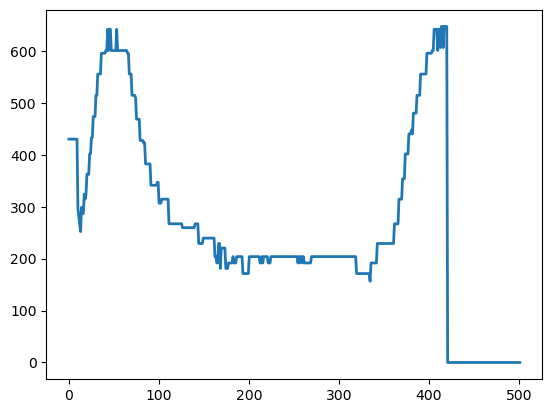

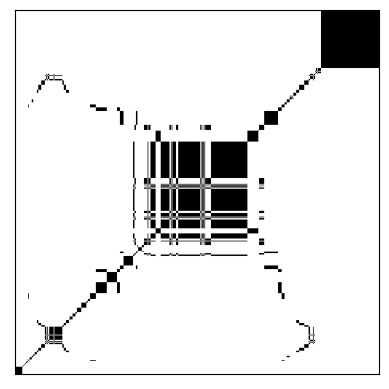

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from pyts.image import RecurrencePlot

y = np.linspace(0,max(lengths),max(lengths))

# Create a toy time series using the sine function
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)

a = 25

x = vidcoordinates[a]

print(vidvalue[a])

X = np.array([x])

plt.plot(y, x, linewidth=2.0)

gs = fig.add_gridspec(2, 2,  width_ratios=(2, 7), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Recurrence plot transformation
rp = RecurrencePlot(threshold=np.pi/18)
X_rp = rp.transform(X)

# Plot the time series and its recurrence plot
fig = plt.figure(figsize=(6, 6))


# Plot the recurrence plot on the bottom right
ax_rp = fig.add_subplot(gs[1, 1])
ax_rp.imshow(X_rp[0], cmap='binary', origin='lower',
             extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_rp.set_xticks([])
ax_rp.set_yticks([])

plt.show()

In [11]:
print(len(vidvalue))
print(len(vidcoordinates))

120
120


In [18]:
#Denna cell är själva neurala nätverket, så lägg in en till cell under som tar samma input men med annan ML-algoritm

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

import numpy as np

y = np.array(vidvalue)
X = np.array(vidcoordinates)



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
#X_train, X_test = X_train / 1080.0, X_test / 1080.0
print(X_train)
print(y_train)
#Gammalt

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)


model = tf.keras.models.Sequential([
  #tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  #tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, y_train,
           batch_size=25,
           epochs=7,
           verbose=1,
           validation_data=(X_test, y_test))

model.evaluate(X_test, y_test)

[[251.46172671 251.46172671 251.46172671 ...   0.           0.
    0.        ]
 [352.3024269  352.3024269  352.3024269  ...   0.           0.
    0.        ]
 [188.43035849 251.46172671 144.26711337 ...   0.           0.
    0.        ]
 ...
 [418.12199177 418.12199177 418.12199177 ...   0.           0.
    0.        ]
 [407.74624462 401.20443667 401.20443667 ...   0.           0.
    0.        ]
 [432.53901558 432.53901558 432.53901558 ...   0.           0.
    0.        ]]
[0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1]
Epoch 1/7
4/4 [==============================] - 2s 170ms/step - loss: 29.7040 - accuracy: 0.7222 - val_loss: 61.9561 - val_accuracy: 0.7000
Epoch 2/7
4/4 [==============================] - 0s 35ms/step - loss: 21.1109 - accuracy: 0.7889 - val_loss: 46.0900 - val_accuracy: 0.5667
Epoch 3/7
4/4 [==============================] - 0s 36m

[34.11519241333008, 0.7333333492279053]

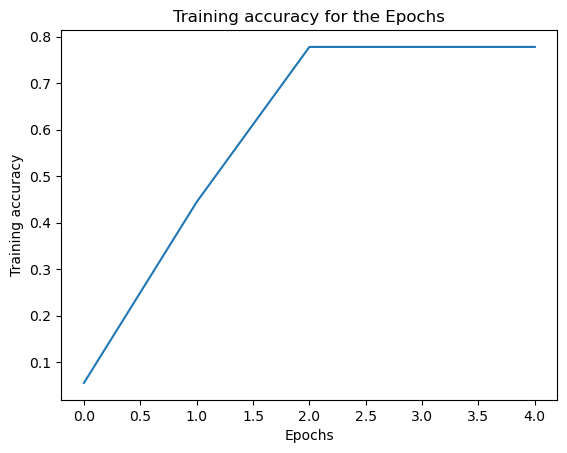

In [52]:
plt.plot(fit_info.history["accuracy"])
plt.title('Training accuracy for the Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training accuracy')

plt.show()

In [ ]:
plot_confusion_matrix(estimator=classifier, X=test_data, y_true=test_labels)